# On time bus performance

In [62]:
#This is a thrilling notebook. 
# Cause this is thriller, thriller night

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Aquire

In [4]:
df = pd.read_csv('../resource_files/BusOnTimePerformance_2020.csv')
df

,ServiceDateTime,Route,RouteName,EarlyDeparture,OnTime,LateArrival,Missing,TimePointCount,OTP,AverageDwellTime
0,2/12/18,2,BLANCO,83,626,87,82,796,78.64,103.97
1,2/12/18,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29
2,2/12/18,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31
3,2/12/18,5,McCULLOUGH,7,403,30,10,440,91.59,211.44
4,2/12/18,6,US-281 Express,1,54,22,11,77,70.13,163.19
...,...,...,...,...,...,...,...,...,...,...
107314,5/4/20,647,North Star / Harry Wurzbach,9,142,3,1,154,92.21,320.40
107315,5/4/20,648,North Star / Stone Oak,18,186,13,11,217,85.71,126.91
107316,5/4/20,651,Deco District / Castle Hills,5,78,10,3,93,83.87,118.63
107317,5/4/20,660,NW Vista College / University P&R,3,76,0,16,79,96.20,200.24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107319 entries, 0 to 107318
Data columns (total 10 columns):
ServiceDateTime     107319 non-null object
Route               107319 non-null int64
RouteName           107319 non-null object
EarlyDeparture      107319 non-null int64
OnTime              107319 non-null int64
LateArrival         107319 non-null int64
Missing             107319 non-null int64
TimePointCount      107319 non-null int64
OTP                 107156 non-null float64
AverageDwellTime    107155 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 8.2+ MB


In [6]:
df.isnull().sum()

ServiceDateTime       0
Route                 0
RouteName             0
EarlyDeparture        0
OnTime                0
LateArrival           0
Missing               0
TimePointCount        0
OTP                 163
AverageDwellTime    164
dtype: int64

## Data Dictionary

- ServiceDatetTime: date of the bus service
- Route: the route number
- RouteName: the route name
- EarlyDeparture: 
- OnTime:
- LateArrival:
- Missing:
- TimePointCount: the sum of earlydeparture, ontime, & latearrival
- OTP:
- AverageDwellTime:

## Prepare

In [7]:
# lowercase all column names
df.columns = df.columns.str.lower()

In [8]:
# convert the dates to actual datetime
df.servicedatetime = pd.to_datetime(df.servicedatetime)

## Explore

In [9]:
df.route.nunique()

103

> There are 103 different route numbers.

In [10]:
df.route.unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,  17,  20,
        21,  22,  24,  25,  26,  28,  30,  32,  34,  36,  40,  42,  43,
        44,  46,  48,  51,  54,  62,  64,  66,  67,  68,  70,  75,  76,
        77,  79,  82,  88,  89,  90,  93,  94,  95,  96,  97, 100, 101,
       502, 503, 505, 509, 515, 520, 522, 524, 534, 550, 551, 602, 603,
       604, 605, 606, 607, 609, 610, 611, 612, 613, 614, 615, 616, 617,
       618, 619, 620, 629, 630, 631, 632, 640, 641, 642, 647, 648, 651,
       660,  16,  65, 999, 705, 712, 715, 103, 501, 672, 102, 552])

In [11]:
df.routename.nunique()

298

>However, there are 298 different route names. 

In [12]:
df.routename.unique()

array(['BLANCO', 'SAN PEDRO SKIP', 'SAN PEDRO Frequent', 'McCULLOUGH',
       'US-281 Express', 'STONE OAK/DOWNTOWN Express', 'N ST MARYS',
       'BROADWAY', 'NACO/BROADWAY', 'VIVA CULTURE', 'PERRIN BEITEL SKIP',
       'IH-35 Express', 'NEW BRAUNFELS', 'KIRBY / CONVERSE',
       'HAYS Frequent', 'EAST HOUSTON Frequent', 'E. COMMERCE Frequent',
       'MARTIN LUTHER KING', 'PORTER', 'RIGSBY', 'STEVES AVE.',
       "SOUTH ST.MARY'S", 'S.PRESA', 'VIVA MISSIONS', 'ROOSEVELT',
       'SOUTH FLORES', 'PLEASANTON RD.', 'COMMERCIAL', 'IH-35 S Express',
       'NOGALITOS', 'SOUTH ALAMO', 'KIRK', 'US 90 Express', 'CERALVO',
       'LAREDO', 'GUADALUPE', 'CESAR CHAVEZ', 'W. COMMERCE Frequent',
       'WEST COMMERCE Skip', 'MARTIN', 'RUIZ  Frequent', 'CULEBRA',
       'BANDERA', 'POPLAR', 'WOODLAWN', 'IH-10 CROSSROADS/UTSA Express',
       'IH-10 / FIESTA TEXAS Express', 'FREDERICKSBURG RD',
       'VANCE JACKSON', 'WEST AVE', 'PRIMO FRED RD',
       'UTSA/LEON VALLEY BRT', 'THOUSAND OAKS', 'HUE

> A quick glance at the route names appears to show repeats. Let's investigate route names by route number.

In [13]:
for no in df.route.unique():
    print(no)
    print(df [df.route == no].routename.unique())

2
['BLANCO' 'Blanco Frequent' '2-BLANCO RD.']
3
['SAN PEDRO SKIP' 'San Pedro Skip' '3-SAN PEDRO SKIP']
4
['SAN PEDRO Frequent' 'San Pedro Frequent' '4-SAN PEDRO']
5
['McCULLOUGH' 'McCullough' '5-MC CULLOUGH']
6
['US-281 Express' '6-US 281 Express' 'US-281 / IH-37 Express']
7
['STONE OAK/DOWNTOWN Express' 'Stone Oak Express'
 '7 STONEOAK/DOWNTOWN EXPRESS']
8
['N ST MARYS' "North St. Mary's" '8-N.ST.MARYS' "North St. Mary''s"]
9
['BROADWAY' 'Broadway Frequent' '9-BROADWAY']
10
['NACO/BROADWAY' 'Naco / Broadway Frequent'
 '10-NACO/BROADWAY /NACO PASS \xa0 \xa0 \xa0 \xa0']
11
['VIVA CULTURE' 'VIVA Culture' '11 VIVA Culture']
14
['PERRIN BEITEL SKIP' 'Perrin Beitel Skip' '14 Perrin Beitel ']
17
['IH-35 Express' '17-IH 35 Express']
20
['NEW BRAUNFELS' 'NEW BRAUNFELS Frequent' 'New Braunfels Frequent'
 '20-NEW BRAUNFELS']
21
['KIRBY / CONVERSE' 'Kirby / Converse' '21 KIRBY / CONVERSE']
22
['HAYS Frequent' 'Hays Frequent' '22-HAYS                             ']
24
['EAST HOUSTON Frequent' 'Eas

> It appears the majority of the routes have the same main road in their name, but have multiple variations of that road name. Let's investigate more. 

In [14]:
df [df.routename == 'SAN PEDRO SKIP'].sort_values('servicedatetime')

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
3463,2017-01-01,3,SAN PEDRO SKIP,10,348,68,20,426,81.69,168.58
3433,2017-01-02,3,SAN PEDRO SKIP,3,327,150,15,480,68.13,129.43
3543,2017-01-03,3,SAN PEDRO SKIP,19,479,163,10,661,72.47,213.06
3691,2017-01-04,3,SAN PEDRO SKIP,16,575,66,14,657,87.52,175.23
3781,2017-01-05,3,SAN PEDRO SKIP,44,504,88,35,636,79.25,180.84
...,...,...,...,...,...,...,...,...,...,...
49256,2019-01-02,3,SAN PEDRO SKIP,20,786,75,19,881,89.22,143.65
63456,2019-01-03,3,SAN PEDRO SKIP,22,651,216,11,889,73.23,140.93
63510,2019-01-04,3,SAN PEDRO SKIP,18,586,279,17,883,66.36,126.29
50480,2019-01-05,3,SAN PEDRO SKIP,5,369,183,13,557,66.25,141.12


In [15]:
df [df.routename == 'San Pedro Skip'].sort_values('servicedatetime')

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
50652,2019-01-07,3,San Pedro Skip,13,520,242,127,775,67.10,152.32
50431,2019-01-08,3,San Pedro Skip,6,592,275,30,873,67.81,129.63
51272,2019-01-09,3,San Pedro Skip,3,569,237,93,809,70.33,157.77
51410,2019-01-10,3,San Pedro Skip,11,631,247,13,889,70.98,132.08
51456,2019-01-11,3,San Pedro Skip,5,642,246,9,893,71.89,119.71
...,...,...,...,...,...,...,...,...,...,...
106948,2020-04-30,3,San Pedro Skip,37,575,45,87,657,87.52,247.60
107030,2020-05-01,3,San Pedro Skip,27,554,66,97,647,85.63,218.90
107112,2020-05-02,3,San Pedro Skip,19,467,32,52,518,90.15,163.44
107193,2020-05-03,3,San Pedro Skip,13,420,16,61,449,93.54,212.11


> In this one example, the route name stays the same, it just becomes lowercase in 2019. 

In [16]:
df [df.routename == '3-SAN PEDRO SKIP'].sort_values('servicedatetime')

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
64378,2018-01-08,3,3-SAN PEDRO SKIP,5,509,86,12,600,84.83,119.40
64318,2018-01-09,3,3-SAN PEDRO SKIP,6,534,63,9,603,88.56,128.78
64470,2018-01-10,3,3-SAN PEDRO SKIP,5,544,56,7,605,89.92,157.65
64644,2018-01-11,3,3-SAN PEDRO SKIP,8,513,76,15,597,85.93,180.30
64717,2018-01-12,3,3-SAN PEDRO SKIP,6,531,65,10,602,88.21,89.00
65278,2018-01-13,3,3-SAN PEDRO SKIP,4,391,51,5,446,87.67,140.03
65368,2018-01-14,3,3-SAN PEDRO SKIP,3,375,21,7,399,93.98,187.72
65454,2018-01-15,3,3-SAN PEDRO SKIP,2,398,42,9,442,90.05,120.22
64809,2018-01-16,3,3-SAN PEDRO SKIP,18,578,7,9,603,95.85,101.70
65629,2018-01-17,3,3-SAN PEDRO SKIP,1,566,37,8,604,93.71,172.53


In [17]:
df [(df.routename == 'SAN PEDRO SKIP') & (df.servicedatetime > '2018-01-08') & (df.servicedatetime < '2018-01-30')]

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime


> The dates included in the '3-SAN PEDRO SKIP' data are not included in the 'SAN PEDRO SKIP.

> This tells us that in January 2018, the route names changed to include the route number, but removed the number after that month.

In [18]:
df [df.routename == 'SAN PEDRO Frequent'].sort_values('servicedatetime')

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
3464,2017-01-01,4,SAN PEDRO Frequent,13,457,18,7,488,93.65,217.69
3434,2017-01-02,4,SAN PEDRO Frequent,19,449,49,5,517,86.85,139.13
3544,2017-01-03,4,SAN PEDRO Frequent,21,510,156,46,687,74.24,140.91
3692,2017-01-04,4,SAN PEDRO Frequent,22,464,71,157,557,83.30,146.26
3782,2017-01-05,4,SAN PEDRO Frequent,18,559,120,23,697,80.20,143.22
...,...,...,...,...,...,...,...,...,...,...
49257,2019-01-02,4,SAN PEDRO Frequent,25,559,84,17,668,83.68,76.14
63457,2019-01-03,4,SAN PEDRO Frequent,33,486,140,26,659,73.75,75.52
63511,2019-01-04,4,SAN PEDRO Frequent,31,486,148,20,665,73.08,77.50
50481,2019-01-05,4,SAN PEDRO Frequent,5,338,123,12,466,72.53,56.41


> There are two different routes with San Pedro in the name. There are probaly more routes numbers that encompass the same road. This makes it unreasonable to try and extract the main road name of each route. Going foward in the analysis, it seems best to focus on the route number, rather than the name, as it is an unchanging variable. 

In [19]:
# df.drop(columns='routename', inplace=True)

In [20]:
df

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
0,2018-02-12,2,BLANCO,83,626,87,82,796,78.64,103.97
1,2018-02-12,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29
2,2018-02-12,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31
3,2018-02-12,5,McCULLOUGH,7,403,30,10,440,91.59,211.44
4,2018-02-12,6,US-281 Express,1,54,22,11,77,70.13,163.19
...,...,...,...,...,...,...,...,...,...,...
107314,2020-05-04,647,North Star / Harry Wurzbach,9,142,3,1,154,92.21,320.40
107315,2020-05-04,648,North Star / Stone Oak,18,186,13,11,217,85.71,126.91
107316,2020-05-04,651,Deco District / Castle Hills,5,78,10,3,93,83.87,118.63
107317,2020-05-04,660,NW Vista College / University P&R,3,76,0,16,79,96.20,200.24


In [21]:
df.route.value_counts()

62     1202
25     1202
17     1202
82     1202
20     1202
       ... 
102     238
999       5
705       2
715       2
712       2
Name: route, Length: 103, dtype: int64

> Four routes have 5 or less logged instances. They will be removed from the analysis. 

In [22]:
to_drop = list(df.route.value_counts() [df.route.value_counts() <= 5].index)
to_drop

[999, 705, 715, 712]

In [23]:
for route in to_drop:
   df = df [df.route != route]

In [24]:
df.route.value_counts()

62     1202
25     1202
17     1202
82     1202
20     1202
       ... 
672     469
16      369
65      369
552     238
102     238
Name: route, Length: 99, dtype: int64

In [25]:
df

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
0,2018-02-12,2,BLANCO,83,626,87,82,796,78.64,103.97
1,2018-02-12,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29
2,2018-02-12,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31
3,2018-02-12,5,McCULLOUGH,7,403,30,10,440,91.59,211.44
4,2018-02-12,6,US-281 Express,1,54,22,11,77,70.13,163.19
...,...,...,...,...,...,...,...,...,...,...
107314,2020-05-04,647,North Star / Harry Wurzbach,9,142,3,1,154,92.21,320.40
107315,2020-05-04,648,North Star / Stone Oak,18,186,13,11,217,85.71,126.91
107316,2020-05-04,651,Deco District / Castle Hills,5,78,10,3,93,83.87,118.63
107317,2020-05-04,660,NW Vista College / University P&R,3,76,0,16,79,96.20,200.24


> we've determined to only analysis data pre-covid data. removing all data from march 1, 2020 on. 

In [26]:
df = df [df.servicedatetime < '2020-03-01']
df.tail()

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
101824,2020-02-29,647,North Star / Harry Wurzbach,3,113,15,4,131,86.26,204.51
101825,2020-02-29,648,North Star / Stone Oak,5,194,6,12,205,94.63,312.51
101826,2020-02-29,651,Deco District / Castle Hills,1,66,29,0,96,68.75,172.86
101827,2020-02-29,660,NW Vista College / University P&R,15,137,7,1,159,86.16,82.17
101828,2020-02-29,672,TAMUSA / Madla Transit Center,22,150,20,8,192,78.13,136.38


In [27]:
df [(df.earlydeparture + df.ontime + df.latearrival) != df.timepointcount]

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime


> the timepointcount encompasses earlydepature, ontime, and latearrival. does not include missing. 

In [28]:
df.head()

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
0,2018-02-12,2,BLANCO,83,626,87,82,796,78.64,103.97
1,2018-02-12,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29
2,2018-02-12,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31
3,2018-02-12,5,McCULLOUGH,7,403,30,10,440,91.59,211.44
4,2018-02-12,6,US-281 Express,1,54,22,11,77,70.13,163.19


In [29]:
df.groupby('route').mean().sort_values('otp',ascending=False).head()

,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
route,,,,,,,
611,2.751318,125.994728,11.887522,5.337434,140.633568,89.926898,190.392206
609,3.043937,105.735501,9.536907,3.894552,118.316344,89.761441,204.087513
642,1.156639,79.881743,9.211618,7.050830,90.250000,88.509153,148.203483
612,2.603691,93.251318,9.495606,6.976274,105.350615,88.507206,197.024763
606,11.929701,189.644991,13.504394,8.096661,215.079086,88.247627,130.588779


In [30]:
routes = df.groupby('route').mean().sort_values('otp', ascending=False).head().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 611
['VALLEY-HI / KEL-LAC' 'Valley-Hi / Kel-Lac' '611-VALLEY HI']

rounte number: 609
['INGRAM/MAINLAND' 'Ingram / Mainland'
 '609-INGRAM/MAINLAND                 ']

rounte number: 642
['NACOGDOCHES' 'Nacogdoches' '642 Nacogdoches / Rolling Oaks Mall']

rounte number: 612
['KEL-LAC/WESTLAKES' 'Kel-Lac / Westlakes' '612-WESTLAKES']

rounte number: 606
['MEDICAL CENTER/ALAMO RANCH' 'Medical Center / Alamo Ranch'
 '606 \xa0MED. CTR./ALAMO RANCH']



> these routes were given the highest average on time performance ratings. it is unknown how that rating is calculated. 

In [31]:
df.groupby('route').mean().sort_values('otp',ascending=False).tail()

,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
route,,,,,,,
660,5.820166,111.793139,41.846154,24.408524,159.459459,70.258087,110.582786
54,3.051975,73.852391,31.664241,7.907484,108.568607,68.015062,125.372890
552,46.603448,385.632184,141.419540,91.793103,573.655172,66.895690,201.628563
97,13.441125,315.278559,158.156415,38.052724,486.876098,64.858902,143.610791
7,3.386792,28.854717,21.398113,20.149057,53.639623,54.834925,99.658358


In [32]:
routes = df.groupby('route').mean().sort_values('otp', ascending=False).tail().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 660
['NWVISTAS/UNIVESITY P&R' 'NWVISTAS/UNIVERSITY P&R'
 'NW Vista College / University P&R' '660-UNIV P&R / NW VISTA']

rounte number: 54
['SOUTH ALAMO' 'South Alamo' '54-SOUTH ALAMO                      ']

rounte number: 552
['Loop 410 / W. W. White Skip']

rounte number: 97
['WEST AVE' 'West Avenue' '97-WEST AVENUE']

rounte number: 7
['STONE OAK/DOWNTOWN Express' 'Stone Oak Express'
 '7 STONEOAK/DOWNTOWN EXPRESS']



> these routes were given the lowest average on time performance ratings. it is unknown how that rating is calculated. 

In [33]:
df.groupby('route').mean().sort_values('averagedwelltime', ascending=False)

,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime
route,,,,,,,
16,0.750000,38.505682,5.440341,14.298295,44.696023,87.325648,352.644136
65,0.994318,34.786932,8.761364,14.457386,44.542614,79.358179,260.804660
503,10.621410,188.275457,39.600522,22.430809,238.497389,79.144308,231.281097
648,9.584359,185.694200,17.405975,10.985940,212.684534,87.359429,230.625290
103,21.972840,607.891358,63.990123,109.735802,693.854321,88.093432,218.771136
...,...,...,...,...,...,...,...
7,3.386792,28.854717,21.398113,20.149057,53.639623,54.834925,99.658358
629,4.642355,110.160808,26.519332,14.304921,141.322496,77.891397,96.570896
94,17.958506,178.817427,36.205394,23.460581,232.981328,76.931245,95.626608


In [34]:
routes = df.groupby('route').mean().sort_values('averagedwelltime', ascending=False).head().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 16
['JBSA EXPRESS FT. SAM HOUSTON / USO' 'JBSA Express Ft. Sam Houston / USO'
 '16-Ft. Sam Express']

rounte number: 65
['JBSA EXPRESS LACKLAND AFB/USO' 'JBSA Express / Lackland / USO'
 '65-LACKLAND/USO EXPRESS         ']

rounte number: 503
['HUEBNER CROSSTOWN' 'Huebner Crosstown' '503 HUEBNER ']

rounte number: 648
['NORTH STAR / STONE OAK PKWY.' 'North Star / Stone Oak'
 '648  NORTH STAR / STONE OAK PKWY.']

rounte number: 103
['Primo / Zarzamora']



> these are the routes with the longest dwell times. 

In [35]:
routes = df.groupby('route').mean().sort_values('averagedwelltime', ascending=False).tail().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 7
['STONE OAK/DOWNTOWN Express' 'Stone Oak Express'
 '7 STONEOAK/DOWNTOWN EXPRESS']

rounte number: 629
['INDUSTRY PARK' 'Industry Park' '629 - INDUSTRY PARK']

rounte number: 94
['IH-10 / FIESTA TEXAS Express' 'IH10 / Fiesta Texas Express'
 '94-IH 10/ FIESTA TEXAS/EXPRESS \xa0 \xa0 \xa0 \xa0 \xa0']

rounte number: 40
['VIVA MISSIONS' 'VIVA Missions' '40-VIVA Mission']

rounte number: 4
['SAN PEDRO Frequent' 'San Pedro Frequent' '4-SAN PEDRO']



>these are the routes with the shortest dwell times

#### Next, we'll look at the early depature, on time, and late arrivals. we'll convert them to percents, so the routes can be compared between each other

In [36]:
df['early_pct'] = df.earlydeparture / df.timepointcount
df['ontime_pct'] = df.ontime / df.timepointcount
df['late_pct'] = df.latearrival / df.timepointcount

In [37]:
df_percents = df[['route','early_pct','ontime_pct','late_pct']]

#### top early depatures

In [38]:
df_percents.groupby('route').mean().sort_values('early_pct', ascending=False).head()

,early_pct,ontime_pct,late_pct
route,,,
40,0.114372,0.731737,0.153891
101,0.084659,0.860183,0.055157
501,0.078055,0.866506,0.055439
552,0.077278,0.668959,0.253763
94,0.076381,0.769314,0.154306


In [39]:
routes = df_percents.groupby('route').mean().sort_values('early_pct', ascending=False).head().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 40
['VIVA MISSIONS' 'VIVA Missions' '40-VIVA Mission']

rounte number: 101
['UTSA/LEON VALLEY BRT' '101 - PRIMO LEON VALLEY/UTSA']

rounte number: 501
['UTSA / Leon Valley']

rounte number: 552
['Loop 410 / W. W. White Skip']

rounte number: 94
['IH-10 / FIESTA TEXAS Express' 'IH10 / Fiesta Texas Express'
 '94-IH 10/ FIESTA TEXAS/EXPRESS \xa0 \xa0 \xa0 \xa0 \xa0']



#### top late arrivals

In [40]:
df_percents.groupby('route').mean().sort_values('late_pct', ascending=False).head()

,early_pct,ontime_pct,late_pct
route,,,
7,0.063228,0.548347,0.388425
97,0.027224,0.648589,0.324187
54,0.028060,0.680148,0.291792
660,0.037535,0.702580,0.259885
67,0.029512,0.712961,0.257527


In [41]:
routes = df_percents.groupby('route').mean().sort_values('late_pct', ascending=False).head().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 7
['STONE OAK/DOWNTOWN Express' 'Stone Oak Express'
 '7 STONEOAK/DOWNTOWN EXPRESS']

rounte number: 97
['WEST AVE' 'West Avenue' '97-WEST AVENUE']

rounte number: 54
['SOUTH ALAMO' 'South Alamo' '54-SOUTH ALAMO                      ']

rounte number: 660
['NWVISTAS/UNIVESITY P&R' 'NWVISTAS/UNIVERSITY P&R'
 'NW Vista College / University P&R' '660-UNIV P&R / NW VISTA']

rounte number: 67
['LAREDO' 'Laredo' '67-LAREDO']



#### Top on time aka most consistent

In [42]:
df_percents.groupby('route').mean().sort_values('ontime_pct', ascending=False).head()

,early_pct,ontime_pct,late_pct
route,,,
611,0.020150,0.899268,0.080582
609,0.024766,0.897616,0.077618
642,0.012983,0.885090,0.101926
612,0.024659,0.885069,0.090272
606,0.055400,0.882473,0.062127


In [43]:
routes = df_percents.groupby('route').mean().sort_values('ontime_pct', ascending=False).head().index

for rout in routes:
    print('rounte number:', rout)
    print(df [df.route == rout].routename.unique())
    print()

rounte number: 611
['VALLEY-HI / KEL-LAC' 'Valley-Hi / Kel-Lac' '611-VALLEY HI']

rounte number: 609
['INGRAM/MAINLAND' 'Ingram / Mainland'
 '609-INGRAM/MAINLAND                 ']

rounte number: 642
['NACOGDOCHES' 'Nacogdoches' '642 Nacogdoches / Rolling Oaks Mall']

rounte number: 612
['KEL-LAC/WESTLAKES' 'Kel-Lac / Westlakes' '612-WESTLAKES']

rounte number: 606
['MEDICAL CENTER/ALAMO RANCH' 'Medical Center / Alamo Ranch'
 '606 \xa0MED. CTR./ALAMO RANCH']



### Number of stops per day

In [45]:
df.head()

,servicedatetime,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime,early_pct,ontime_pct,late_pct
0,2018-02-12,2,BLANCO,83,626,87,82,796,78.64,103.97,0.104271,0.786432,0.109296
1,2018-02-12,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29,0.008319,0.861897,0.129784
2,2018-02-12,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31,0.035959,0.777397,0.186644
3,2018-02-12,5,McCULLOUGH,7,403,30,10,440,91.59,211.44,0.015909,0.915909,0.068182
4,2018-02-12,6,US-281 Express,1,54,22,11,77,70.13,163.19,0.012987,0.701299,0.285714


In [73]:
df.groupby(df.servicedatetime).sum().timepointcount

servicedatetime
2017-01-01    20931
2017-01-02    25022
2017-01-03    31785
2017-01-04    31768
2017-01-05    32073
              ...  
2020-02-25    33869
2020-02-26    33841
2020-02-27    34002
2020-02-28    33730
2020-02-29    24857
Name: timepointcount, Length: 1138, dtype: int64

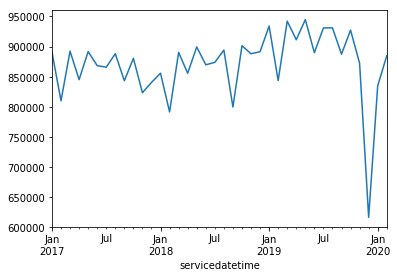

In [68]:
df.set_index('servicedatetime').resample('M').sum().timepointcount.plot()
plt.show()

In [66]:
df.set_index('servicedatetime').o

,route,routename,earlydeparture,ontime,latearrival,missing,timepointcount,otp,averagedwelltime,early_pct,ontime_pct,late_pct
servicedatetime,,,,,,,,,,,,
2018-02-12,2,BLANCO,83,626,87,82,796,78.64,103.97,0.104271,0.786432,0.109296
2018-02-12,3,SAN PEDRO SKIP,5,518,78,11,601,86.19,167.29,0.008319,0.861897,0.129784
2018-02-12,4,SAN PEDRO Frequent,21,454,109,130,584,77.74,78.31,0.035959,0.777397,0.186644
2018-02-12,5,McCULLOUGH,7,403,30,10,440,91.59,211.44,0.015909,0.915909,0.068182
2018-02-12,6,US-281 Express,1,54,22,11,77,70.13,163.19,0.012987,0.701299,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,647,North Star / Harry Wurzbach,3,113,15,4,131,86.26,204.51,0.022901,0.862595,0.114504
2020-02-29,648,North Star / Stone Oak,5,194,6,12,205,94.63,312.51,0.024390,0.946341,0.029268
2020-02-29,651,Deco District / Castle Hills,1,66,29,0,96,68.75,172.86,0.010417,0.687500,0.302083
